In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import shapely
import rasterio
from rasterio.plot import show
from rasterio import plot
import gdal
from gdal import *
import cv2
from spectral import*

In [8]:
img=r'D:\AA GEOINFO IIST\Raster image\Orissa1.tif'
dataset=rasterio.open(img)

In [30]:
Crs=dataset.crs
trans=dataset.transform
cols=dataset.width
rows=dataset.height
bands=dataset.count
bounds=dataset.bounds
print(dataset)
print(Crs)
print(trans)
print(cols)
print(rows)
print(bands)
print(bounds)

<open DatasetReader name='D:\AA GEOINFO IIST\Raster image\Orissa1.tif' mode='r'>
EPSG:4326
| 0.00, 0.00, 86.75|
| 0.00,-0.00, 20.75|
| 0.00, 0.00, 1.00|
1153
1153
3
BoundingBox(left=86.7453875, bottom=20.4951875, right=87.0048125, top=20.7546125)


In [31]:
band1=dataset.read(1)
print(band1)

[[108 107 107 ... 112 112 113]
 [108 108 107 ... 111 112 113]
 [107 107 106 ... 112 111 112]
 ...
 [ 95  95  95 ...  81  81  81]
 [ 94  94  95 ...  81  81  81]
 [ 94  94  95 ...  81  81  81]]


In [12]:
with rasterio.open(img) as r:
    raster_mat=r.read()
    
raster_mat_1=raster_mat.T

spectral:INFO: k-means iteration 1 - 776974 pixels reassigned.
spectral:INFO: k-means iteration 2 - 68307 pixels reassigned.
spectral:INFO: k-means iteration 3 - 167770 pixels reassigned.
spectral:INFO: k-means iteration 4 - 126400 pixels reassigned.
spectral:INFO: k-means iteration 5 - 71135 pixels reassigned.
spectral:INFO: k-means iteration 6 - 38637 pixels reassigned.
spectral:INFO: k-means iteration 7 - 21714 pixels reassigned.
spectral:INFO: k-means iteration 8 - 12365 pixels reassigned.
spectral:INFO: k-means iteration 9 - 6488 pixels reassigned.
spectral:INFO: k-means iteration 10 - 3759 pixels reassigned.
spectral:INFO: k-means iteration 11 - 1684 pixels reassigned.
spectral:INFO: k-means iteration 12 - 943 pixels reassigned.
spectral:INFO: k-means iteration 13 - 487 pixels reassigned.
spectral:INFO: k-means iteration 14 - 332 pixels reassigned.
spectral:INFO: k-means iteration 15 - 250 pixels reassigned.
spectral:INFO: k-means iteration 16 - 121 pixels reassigned.
spectral:IN

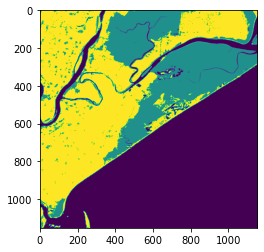

In [13]:
# image classification using 3 categories by K means clustering:
(m,c)=kmeans(raster_mat_1,3,30)
plt.imshow(m.T)

In [14]:
dataset.indexes

(1, 2, 3)

In [16]:
band1=dataset.read(1)

In [17]:
print(band1)

[[108 107 107 ... 112 112 113]
 [108 108 107 ... 111 112 113]
 [107 107 106 ... 112 111 112]
 ...
 [ 95  95  95 ...  81  81  81]
 [ 94  94  95 ...  81  81  81]
 [ 94  94  95 ...  81  81  81]]


In [19]:
smallest = np.amin(band1)
largest=np.amax(band1)
print(smallest)
print(largest)

75
144


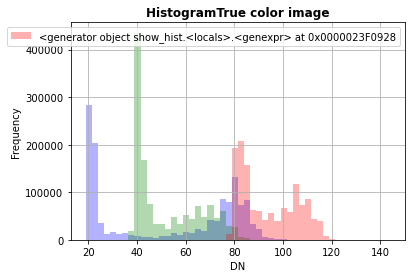

In [22]:
# histogram for RGB image
plot.show_hist(dataset,bins=50,lw=0.0,stacked=False,alpha=0.3,histtype='stepfilled',title="HistogramTrue color image")

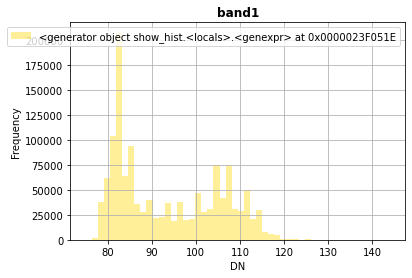

In [25]:
# histogram for individual bands
# band 1
plot.show_hist(band1,bins=50,lw=1.0,stacked=False,alpha=0.4,histtype='stepfilled',title="band1")

In [26]:
band2=dataset.read(2)
band3=dataset.read(3)
print(band2)
print(band3)

[[72 70 68 ... 73 72 72]
 [71 71 69 ... 72 72 73]
 [69 68 67 ... 73 73 72]
 ...
 [49 49 50 ... 40 40 40]
 [49 48 50 ... 40 40 41]
 [49 48 50 ... 40 40 41]]
[[76 77 78 ... 42 42 43]
 [74 76 79 ... 42 42 42]
 [76 79 80 ... 42 42 42]
 ...
 [81 83 80 ... 20 20 21]
 [81 85 83 ... 20 20 21]
 [83 86 83 ... 21 21 21]]


In [27]:
smallest = np.amin(band2)
largest=np.amax(band2)
print(smallest)
print(largest)

36
103


In [29]:
smallest = np.amin(band3)
largest=np.amax(band3)
print(smallest)
print(largest)

19
113


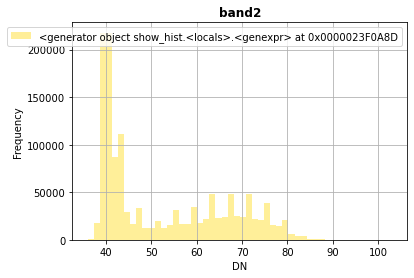

In [35]:
# band 2 histogram
plot.show_hist(band2,bins=50,lw=1.0,stacked=False,alpha=0.4,histtype='stepfilled',title="band2")

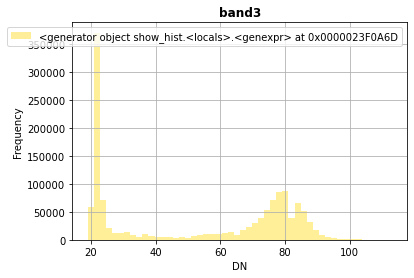

In [36]:
# band 3 histogram
plot.show_hist(band3,bins=50,lw=1.0,stacked=False,alpha=0.4,histtype='stepfilled',title="band3")

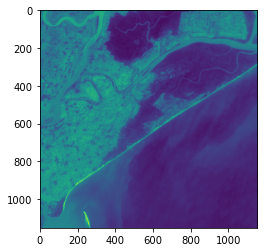

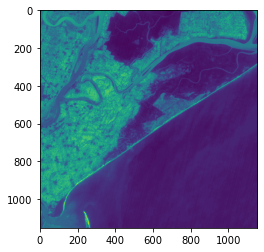

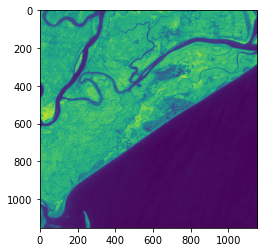

In [37]:
#fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(14,4))
plot.show(band1,ax1)
plot.show(band2,ax2)
plot.show(band3,ax3)
fig.tight_layout()

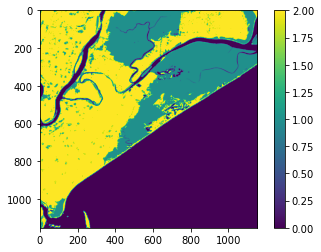

In [40]:
# map form using colormaps
plt.imshow(m.T)
plt.colorbar()